# <center> Stack Overflow Tag Prediction </center>


<img src="image.jpeg">

## 1.Description:
StackOverflow is a platform where programmers across the world ask their programming queries and other programmers help them to overcome it. To make this process fast we classify the problem into certain categories so that the programmers active in that categories can be shown the question for fast answer.

## 2.Problem: 
The basic task is to predict the tags related to question for classification of the question in one or multiple classes.

### 2.1Problem Source: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction

### 2.2 Bird’s-eye view of the project:

   ##### Part-1: Overview of multi-label classification.
   ##### Part-2: Problem definition & evaluation metrics.
   ##### Part-3: Exploratory data analysis (EDA).
   ##### Part-4: Data pre-processing.
   ##### Part-5: Multi-label classification techniques.


### 2.2.Constraints and Previlages:
1. Predicting as many tags as possible with high precision and recall.
2. Wrong tags may result into bad user experience.
3. No strict latency.

## 3. Data:
Refer: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data

### 3.1 Data Overview:
Train.csv contains 4 columns: Id,Title,Body,Tags.

Test.csv contains the same columns but without the Tags, which you are to predict.

Size of Train.csv - 6.75GB

Size of Test.csv - 2GB

Number of rows in Train.csv = 6034195

### 3.2 Data Fields:
1. ID: Unique identity of each question asked.

2. Title: The heading or the brief description of the problem

3. Body: Body of the question.

4. Tags: The tags associated with the question.

### 3.3 Example Data Point

Title:  Implementing Boundary Value Analysis of Software Testing in a C++ program?

Body : 


        #include<iostream>
        #include<stdlib.h>\n\n
        using namespace std;\n\n
        int main()\n
        {\n
                 int n,a[n],x,c,u[n],m[n],e[n][4];\n         
                 cout<<"Enter the number of variables";\n         cin>>n;\n\n         
                 cout<<"Enter the Lower, and Upper Limits of the variables";\n         
                 for(int y=1; y<n+1; y++)\n         
                 {\n                 
                    cin>>m[y];\n                 
                    cin>>u[y];\n         
                 }\n         
                 for(x=1; x<n+1; x++)\n         
                 {\n                 
                    a[x] = (m[x] + u[x])/2;\n         
                 }\n         
                 c=(n*4)-4;\n         
                 for(int a1=1; a1<n+1; a1++)\n         
                 {\n\n             
                    e[a1][0] = m[a1];\n             
                    e[a1][1] = m[a1]+1;\n             
                    e[a1][2] = u[a1]-1;\n             
                    e[a1][3] = u[a1];\n         
                 }\n         
                 for(int i=1; i<n+1; i++)\n         
                 {\n            
                    for(int l=1; l<=i; l++)\n            
                    {\n                 
                        if(l!=1)\n                 
                        {\n                    
                            cout<<a[l]<<"\\t";\n                 
                        }\n            
                    }\n            
                    for(int j=0; j<4; j++)\n            
                    {\n                
                        cout<<e[i][j];\n                
                        for(int k=0; k<n-(i+1); k++)\n                
                        {\n                    
                            cout<<a[k]<<"\\t";\n               
                        }\n                
                        cout<<"\\n";\n            
                    }\n        
                 }    \n\n        
                 system("PAUSE");\n        
                 return 0;    \n
        }\n
        

\n\n

    <p>The answer should come in the form of a table like</p>\n\n
    <pre><code>       
    1            50              50\n       
    2            50              50\n       
    99           50              50\n       
    100          50              50\n       
    50           1               50\n       
    50           2               50\n       
    50           99              50\n       
    50           100             50\n       
    50           50              1\n       
    50           50              2\n       
    50           50              99\n       
    50           50              100\n
    </code></pre>\n\n
    <p>if the no of inputs is 3 and their ranges are\n
    1,100\n
    1,100\n
    1,100\n
    (could be varied too)</p>\n\n
    <p>The output is not coming,can anyone correct the code or tell me what\'s wrong?</p>\n'

Tags : 'c++ c'



## 4. Posing the problem as Machine Learning Problem:
The problem can be stated as multi-label classification problem where tags are the classes. A question on StackOverflow can belong to more than one class simultaneously, or in other words can have more than on tag. For example a question may belong  to tags "Machine Learning","NLP","KNN".

### 4.1 Useful links:
https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff

## 5. Exploratory Data Analysis

In [1]:
#importing libraries....
import pandas as pd
import numpy as np
import os
from datetime import datetime 
import datetime as dt
import sqlalchemy
from sqlalchemy import create_engine
import sqlite3
import matplotlib.pyplot as plt

### Importing the data

In [2]:
if not os.path.isfile('train.db'):
    start = datetime.now()
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('Train.csv', names=['Id', 'Title', 'Body', 'Tags'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1
    print("Time taken to run this cell :", datetime.now() - start)

### Counting total no of rows

In [3]:
if os.path.isfile('train.db'):
    start = datetime.now()
    con = sqlite3.connect("train.db")
    no_of_rows = pd.read_sql_query("""SELECT COUNT(*) FROM data""",con)
    print("Total no of rows:", no_of_rows['COUNT(*)'].values[0])
    con.close()
    print("Time consumed : ",datetime.now() - start)
else: print("Download data from: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data")

Total no of rows: 6034196
Time consumed :  0:00:00.151594


### Checking For Duplicates

<h4>I dont have a poweful machine to process 6 million rows, so I am picking first 10k rows.</h4>

In [4]:
data = pd.read_csv('train.csv',nrows=10000)

In [5]:
data.head(25)

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents
5,6,setting proxy in active directory environment,<p>I am using a machine on which active direct...,proxy active-directory jmeter
6,7,How to draw barplot in this way with Coreplot,<p>My image is cannot post so the link is my ...,core-plot
7,8,How to fetch an XML feed using asp.net,<p>I've decided to convert a Windows Phone 7 a...,c# asp.net windows-phone-7
8,9,.NET library for generating javascript?,<p>Do you know of a .NET library for generatin...,.net javascript code-generation
9,10,"SQL Server : procedure call, inline concatenat...",<p>I'm using SQL Server 2008 R2 and was wonder...,sql variables parameters procedure calls


In [6]:
data.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
9970    False
9971    False
9972    False
9973    False
9974    False
9975    False
9976    False
9977    False
9978    False
9979    False
9980    False
9981    False
9982    False
9983    False
9984    False
9985    False
9986    False
9987    False
9988    False
9989    False
9990    False
9991    False
9992    False
9993    False
9994    False
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
#As we can see there are no duplicates in the first 10k rows
data.shape

(10000, 4)

## Exploratory Data Analysis

In [8]:
# Counting no of tags per question.
data["tag_count"] = data["Tags"].apply(lambda text: len(text.split(" ")))
data.head(25)

,Id,Title,Body,Tags,tag_count
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,5
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,1
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,3
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,3
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents,3
5,6,setting proxy in active directory environment,<p>I am using a machine on which active direct...,proxy active-directory jmeter,3
6,7,How to draw barplot in this way with Coreplot,<p>My image is cannot post so the link is my ...,core-plot,1
7,8,How to fetch an XML feed using asp.net,<p>I've decided to convert a Windows Phone 7 a...,c# asp.net windows-phone-7,3
8,9,.NET library for generating javascript?,<p>Do you know of a .NET library for generatin...,.net javascript code-generation,3
9,10,"SQL Server : procedure call, inline concatenat...",<p>I'm using SQL Server 2008 R2 and was wonder...,sql variables parameters procedure calls,5


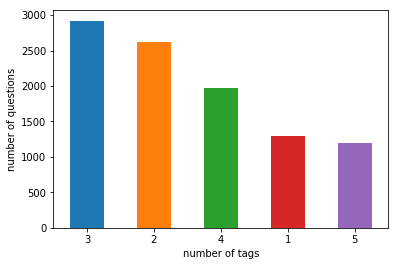

In [9]:
#distribution of the number of tags each question has.
prob = data.tag_count.value_counts()
prob.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel("number of questions")
plt.xlabel("number of tags")
plt.show()

In [10]:
# Total number of uniye tags
len(data["Tags"].unique())

8603